# Преамбула
Экзамен состоит из трёх блоков:  
- программирование на python;  
- работа с датафреймами и описательная статистика;  
- классическое машинное обучение.

Стоимость вопроса равна одному баллу, если не сказано иное.  
Для успешной сдачи экзамена необходимо набрать 50% и более от максимального числа баллов.

- **NB:** В первом блоке (программирование на python) **ЗАПРЕЩЕНО** пользоваться библиотеками, не посталяемыми вместе с python по-умолчанию (т.е. pandas/numpy нельзя использовать в это блоке, а random/json -- можно);
- Во всех задачах на визуализацию **подписи, названия и легенду делать необязательно!**
- Все спорные моменты трактуются в пользу экзаменуемого;  
- Ваш код должен быть воспроизводим (если я положу исходные файлы в ту же папку, что и Ваш ноутбук, и нажму `Run` -> `Run All Cells`, то всё должно работать). Так что соблюдайте логику и последовательнось запуска ячеек. Спасибо :)  
- Можно пользоваться только своей головой, но любыми материалами и интернетом;  
- Если задание кажется сложным -- пропустите его;  

- Во время экзамена я буду отвечать только на вопросы касаемо формулировок заданий.

Главное, не спешите, проверяйте, что и куда записывается.  
За каждого болею.  
Всем удачи!  


<left>
    <img src="Data/Pics/exam.gif"/>
</left>

# A. Базовый python
Для решения задач блока запрещено пользоваться библиотеками, не поставляемые вместе с python.  
Иными словами, всё, что устанавливается через `pip`, тут использовать нельзя.

## 1.
Напишите функцию `fillNegative`, которая принимает непустой список из целых чисел, заменяет in place все отрицательные числа на ноль и возвращает число замещенных чисел.

Пример: 
```
a = [1, 2, -3, 4]
fillNegative(a) # вывод 1
print(a) # вывод [1, 2, 0, 4]
```

#### Решение

#### Проверки

In [2]:
a = [1,2,3]
old_id = id(a)
assert fillNegative(a) == 0
assert old_id == id(a)
assert a == [1,2,3]

In [3]:
a = [1,2,3, -4, 5]
old_id = id(a)
assert fillNegative(a) == 1
assert old_id == id(a)
assert a == [1,2,3, 0, 5]

In [4]:
a = [0, 0, 0, 0]
old_id = id(a)
assert fillNegative(a) == 0
assert old_id == id(a)
assert a == [0, 0, 0, 0]

In [5]:
a = [-1, -1, -1, 0, 5]
old_id = id(a)
assert fillNegative(a) == 3
assert old_id == id(a)
assert a == [0, 0, 0, 0, 5]

## 2.

### 2.1 (2 балла)
Напишите функцию `statsForZtest`, которая принимает непустой список чисел, а возвращает кортеж из трёх значений:
* среднее арифметическое (округлить до 2 знака после запятой);
* выборочное стандартное отклонение (округлить до 2 знака после запятой);
* размер выборки (должно быть целым числом).

Выборочное стандартное отклонение считать по формуле ниже:<br>
<left>
    <img src="Data/pics/sample_std.png"/>
</left><br>
*То есть это сумма квадратов отклонений каждого значения от среднего, деленная на длину списка минус 1, затем возведенная в степень 0.5.

**Среднее и стадартное отклонение нужно округлять только во время возвращения, но не во время расчётов.**


#### Решение

#### Проверки

In [7]:
assert statsForZtest([0, 0, 0, 0]) == (0, 0, 4)

In [8]:
assert statsForZtest([1,2,3,5.17, 4.2, 7, -1]) == (3.05, 2.68, 7)

In [9]:
assert statsForZtest([-1,-2.17, -4.2, -7, 1]) == (-2.67, 3.07, 5)

### 2.2
Напишите функцию `computeZscore`, для подсчета z-статистики. Функция принимает аргументы в следующем порядке:
* `sample_mean` -- среднее выборки,
* `std` -- стандартное отклонение генеральной совокупности,
* `n` -- размер выборки,
* `mu` -- среднее генеральной совокупности (по умолчанию равно нулю).

Функция должна считать значение z-статистики по формуле ниже, округлять результат до 3 знаков после запятой и возвращать результат:<br>
<left>
    <img src="Data/Pics/ztest.png"/>
</left>

#### Решение

#### Проверки

In [11]:
assert computeZscore(sample_mean=7, std=3, n=60, mu=10) == -7.746

In [12]:
assert computeZscore(sample_mean=13, std=3, n=60, mu=10) == 7.746

In [13]:
assert computeZscore(sample_mean=0.95, std=4, n=45) == 1.593

### 2.3
Напишите функцию `ZscoreFromSample`, которая принимает список, затем внутри себя использует функцию `statsForZtest` для подсчета среднего, стандартного отклонения и размера списка. Далее использует функцию `computeZscore` для подсчета z-статистики и возвращает результат (`mu` считать равным нулю).

#### Решение

#### Проверки

In [15]:
assert ZscoreFromSample(list(range(-50, 51))) == 0

In [16]:
assert ZscoreFromSample(list(range(-10, 15))) == 1.359

## 3. (3 балла)
В csv `./Data/sales_task3.csv` файле дана статистика по продажам товаров в формате `Артикул,кол-во единиц`. Количество единиц товара может быть отрицательным, что говорит и произведенном возврате. Артикулы могут повторять (и повторяются).

Напишите программу, которая агрегирует статистику из исходного файла на уровне артикулов и записывает результаты в файл `stats_agg_task3.csv` (то есть не в папку `Data`, а в папку с ноутбуком).

Указания:
* сделайте заголовок, назнваия колонок произвольные;
* в качестве разделителя используйте точку с запятой;
* артикулы должны быть отсортированы по возрастанию;
* для чтения и записи используйте кодировку utf-8.

Пример входного файла:
```
ID;NumberSales
24;4
1;4
1;2
2;7
1;-1
```
Пример выходного файла:
```
ID;StatsAgg
1;5
2;7
24;4
```

\*_В файле `./Data/task3_ans.csv` можно посмотреть формат выходного файла. С помощью этого файла осуществляется проверка решения._


#### Решение

#### Проверка

In [18]:
with open('stats_agg_task3.csv', 'r', encoding='utf8') as student_ans:
    with open('./Data/task3_ans.csv', 'r', encoding='utf8') as correct_ans:
        student_ans.readline()
        correct_ans.readline()

        for i, (a, b) in enumerate(zip(student_ans, correct_ans)):
            id_a, n_a = a.strip().split(';')
            id_b, n_b = b.strip().split(';')
            n_a, n_b = int(n_a), int(n_b)
            try:
                assert id_a == id_b
                assert n_a == n_b
            except Exception as E:
                print(f'ERROR. Line {i+1}\nYour line:"{a.strip()}"\nCorrect line:"{b.strip()}"')
                break


## 4.
Описание классовой структуры

**I.** Есть класс покупателя со следующими атрибутами:
```
Идентификатор
Размер скидки (в долях единицы)
История покупок (список с инвойсами)
```
Пользователь может
```
Печатать информацию о себе (т.е. быть напечатанным)
Очистить итсорию покупок
```

**II.** Есть класс инвойса. Его атрибуты:
```
Идентификатор
Размер инвойса (сумма к оплате до всех скидок)
Пользователь
Дополнительная скидка
```
Инвойс может:
```
Посчитать итоговый размер оплаты с учетом всех скидок (скидка клиента и дополнительная скидка суммируются)
Вывести идентификатор и итоговый размер к оплате после всех скидок (т.е. быть напечатанным)
```

### 4.1 (2 балла)

Класс `Customer`

Напишите конструктор класса `Customer`.<br>
* При инициализации объекты класса принимают следующие аргументы/создают следующие атрибуты:
  * Идентификатор (некоторая строка) (атрибут `Id`);
  * Размер скидки (число от 0 до 1. По умолчанию равно 0.) (атрибут `Discount`);
  * Атрибут `History` изначально равен пустому списку (т.е. не надо принимать никакое значение в аргументах)<br><br>
* Метод `__repr__` должен возвращать объект типа `str`, где на первой строке идентификатор клиента, а зачем на каждой новой строке по элементу из атрибута `History`.

#### Решение

#### Проверка
(`__repr__` проверить автоматически не получится)

In [20]:
c = Customer(12345)
assert c.Id == 12345 
assert c.Discount == 0
assert c.History == []

In [21]:
c = Customer('12345', 0.5)
assert c.Id == '12345' and c.Discount == 0.5

In [22]:
print(c)

ID:12345
History:



In [23]:
c.History.append('a')
c.History.append('b')
c.History.append('c')
print(c)

ID:12345
History:
a
b
c


### 4.3 (2 балла)

Класс `Invoice`

Напишите конструктор класса `Invoice`.<br>
* При инициализации объекты класса принимают следующие аргументы/создают следующие атрибуты:
  * Идентификатор (некоторая строка) (атрибут `Id`);
  * Предварительная сумма к оплате без учета скидок (атрибут `RawAmount`);
  * Клиент, на чьё имя инвойс (атрибут `Customer`);
  * Дополнительная скидка (число от 0 до 1. По умолчанию равно 0.) (атрибут `ExtraDiscount`)<br><br>
* Метод `computeAmount`, аргументы не принимаются. Метод суммирует дополнительную скидку и скидку клиента (линейно, т.е. просто плюсует), затем считает итоговый размер инвойса за вычетом скидки и возвращает его (**округлить** до 1 знака после запятой)<br>_(скидка клиента находится в атрибуте `Discount` экземпляра клиента. Экземпляр клиента сохраняется в атрибут `Customer` при инициализации инвойса.);_<br><br>
* Метод `__repr__` возвращает строку, где на одной строке через проблем написаны идентификатор инвойса и итоговый размер к оплате после учета всех скидок (т.е. внутри `__repr__` нужно пользоваться методом `computeAmount`).

#### Решение

#### Проверки

In [25]:
c = Customer(777)
inv = Invoice(123, 100, c)
assert inv.Id == 123
assert inv.RawAmount == 100
assert inv.Customer == c
assert inv.ExtraDiscount == 0

In [26]:
inv = Invoice(123, 100, c, 0.10)
assert inv.computeAmount() == 90

In [27]:
c = Customer(777, 0.15)
inv = Invoice(123, 100, c, 0.10)
assert inv.computeAmount() == 75

In [28]:
print(inv)

123 75.0


In [29]:
c = Customer(777, 0.10)

inv1 = Invoice(1, 10, c)
inv2 = Invoice(2, 100, c, 0.20)
inv3 = Invoice(3, 1000, c, 0.50)

c.History.append(inv1)
c.History.append(inv2)
c.History.append(inv3)

print(c)

ID:777
History:
1 9.0
2 70.0
3 400.0


# B. Работа с табличными данными

Сеть точек быстрого питания планирует ввести новую позицию в меню. Для продвижениянового блюда были созданы три разные промоушн-кампании. 

Для определения лучшей кампании точки питания были случайно разбиты на три группы, в каждой группе апробируется своя кампания. Записывается среднее число продаж нового блюда за неделю в каждой точке. Время эксперимента – 4 недели. 

    index: unique record identifier
    MarketID: unique identifier for market
    MarketSize: size of market area by sales
    LocationID: unique identifier for store location
    AgeOfStore: age of store in years    
    week: one of four weeks when the promotions were run
    SalesInThousands: sales amount for a specific LocationID, Promotion, and week
    Promotion: one of three promotions that were tested (в отдельном файле)


In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 5.
В файле `./Data/partB_main_data.tsv` находится основная информация. В файле `./Data/partB_promotion.tsv` -- информация о том, к какой рекламной кампании относится каждая запись из `partB_main_data.tsv`.

* Прочитайте оба;
* Соедините датафреймы по колонку `index`;
* Добавьте валидацию, что для 1 строки из первого датафрейма была найдена ровно одна строка из второго;
* После соединения удалите колонку `index`;
* Выведите первые 5 строк конечного датафрейма.

,MarketID,MarketSize,LocationID,AgeOfStore,week,SalesInThousands,Promotion
0,1,Medium,1,4,1,33.73,3
1,1,Medium,1,4,2,35.67,3
2,1,Medium,1,4,3,29.03,3
3,1,Medium,1,4,4,39.25,3
4,1,Medium,2,5,1,27.81,2


## 6.
Для колонки`SalesInThousands` посчитайте медиану, разницу квантиля 0.9 и 0.1, стандартное отклонение. Округлите каждое значение до 2 знаков после запятой.

(**+1 балл** за подсчет всех статистик за строку кода (т.е. за одну команду))

Медиана        50.20
Размах         46.85
СтандОтклон    16.76
Name: SalesInThousands, dtype: float64

## 7.
Посчитайте число строчек в датафрейме для каждого Promotion. Перевиде значения в проценты (в долях единицы). Округлите ответ до 3 знака после запятой.

Promotion
3    0.343
2    0.343
1    0.314
Name: proportion, dtype: float64

## 8.
Для группы по `MarketSize` посчитайте средний возраст магазинов (`AgeOfStore`). Ответ округлите до 1 знака после запятой.

MarketSize
Large      7.1
Medium     8.8
Small     10.8
Name: AgeOfStore, dtype: float64

## 9.
Для каждой группы по `Promotion` посчитайте следующие описательные статистики:<br>
* Для столбца `AgeOfStore` посчитайте среднее;
* Для столбца `SalesInThousands` посчитайте среднее, разницу между минимальным и максимальным значением;
* Все значения округлите до 2 знаков после запятой.

(+1 балл за подсчет всех статистик за строку кода (т.е. за одну команду))

AgeOfStore SalesInThousands       
                mean             mean Размах
Promotion                                   
1               8.28            58.10  68.84
2               7.98            47.33  71.30
3               9.23            55.36  74.30

## 10. (2 балла)
Определите топ-3 `MarketID` по среднему среднему значению `SalesInThousands` в рамках каждой группы по `Promotion`.

,Promotion,MarketID,SalesInThousands,Rank
0,1,3,89.647143,1.0
1,1,2,65.600000,2.0
2,1,10,60.824643,3.0
3,2,3,79.592083,1.0
4,2,4,50.810625,2.0
5,2,9,49.982500,3.0
6,3,3,84.921667,1.0
7,3,2,60.993500,2.0
8,3,10,54.050833,3.0


## 11. 

### 11.1 
Нарисуйте распределение магазинов по возрасту магазинма (гистограмму).

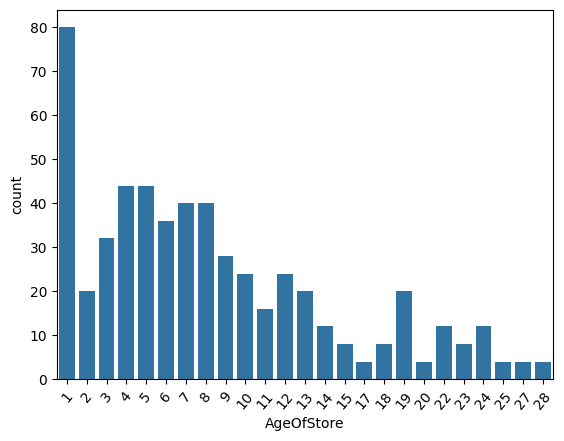

### 11.2 
Добавьте раскраску по тиму Promotion. Сделайте так, чтобы столбцы разных рекламных кампаний располагались друг на друге (см. пример ответа).

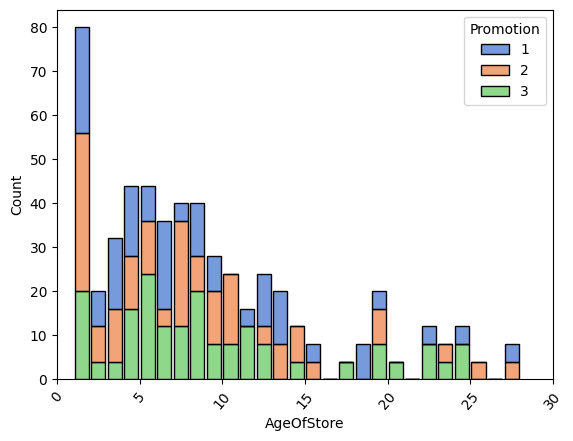

## 12.
Нарисуйте динамику изменения среднего значения `SalesInThousands` по неделям для каждого Promotion. Воспользуйтесь функцией `seaborn.lineplot`. Установите значение аргумента `errobar='se'`.

<Axes: xlabel='week', ylabel='SalesInThousands'>

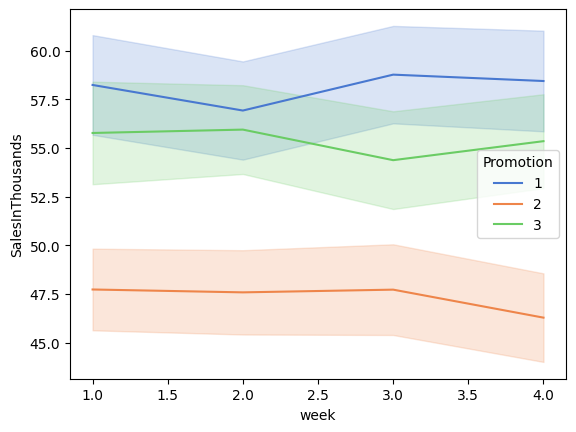

## 13.
    Нарисуйте боксплот для `SalesInThousands` отдельно для каждого MartetSize. Добавьте разбиени по Promotion. Установите порядок размеров рынка (`order`): Small, Medium, Large.

<Axes: xlabel='MarketSize', ylabel='SalesInThousands'>

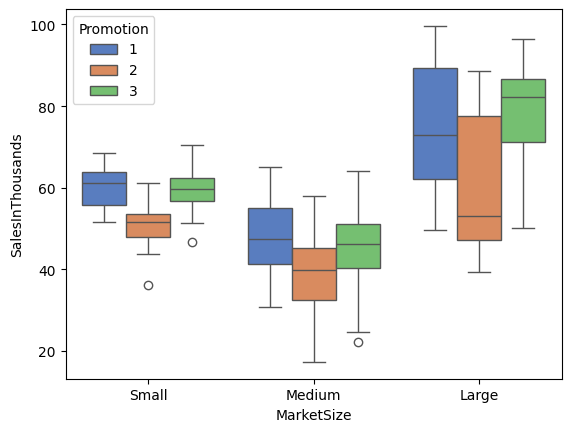

## 14.

### 14.1
Создайте сводную таблицу, где колонки -- `Promotion`, индексы -- `MarketID`, пересечение -- среднее значение для `SalesInThousands` (воспользуйтесь функцией `pivot_table`).

Promotion,1,2,3
MarketID,,,
1,40.7,30.2,34.0
2,65.6,NaN,61.0
3,89.6,79.6,84.9
4,58.8,50.8,52.1
5,55.5,45.9,50.8
6,40.7,32.6,36.8
7,50.1,39.4,44.2
8,51.1,42.5,49.3
9,56.7,50.0,51.9


### 14.1
Для каждого столбца (каждого Promotion) посчитайте в скольки MarketID средний размер продаж в тысячах был больше 50.

Promotion
1    8
2    2
3    6
dtype: int64

## C. Классическое машинное обучение
В этой части мы продолжим работать с предыдущим датасетом.  
Прочитать его заново из файла `WA_Marketing-Campaign.csv` (разделитель запятая). Там данные уже соединены.

In [43]:
dfML = pd.read_csv('./Data/WA_Marketing-Campaign.csv', sep=',', encoding='utf8')

## 15.
Попробуем предсказать тип Promotion.


### 15.1 (5 баллов)
* Удалите столбец `LocationID`, так как в нём слишком много категорией;
* Сконвертируйте категориальные колонки в тип `"category"`;
* Закодируйте категориальные столбцы с помощью one-hot encoding (не забудьте про мультиколлинеарность. не допустите её здесь) (колонку `week` считайте категориальной);
* Разделите данные на трейн и тест. В качестве целевой переменной используйте Promotion.
25% данных выделите в тест. Установите сид для воспроизводимсоит 17022024.
* Проведите стандартизацию признаков (иначе как мы сравним эффекты, если все признаки в разном масштабе);
* Обучите модель логистической регрессии без регуляризации с параметрами по-умолчанию для предсказания типа рекламной кампании;
* Получите предсказания меток класса;
* Так как в данных нет дисбаланса классов, можно просто посчитать точность прогнозов. Посчитайте accuracy.

In [44]:
# запустите эту ячейку, что scaler не убирал названия колонок
from sklearn import set_config
set_config(transform_output='pandas')  

Accuracy: 0.599


## 15.2 (2 балла)
* На тех же данных бля трейна и тест обучение модель k-ближайших соседей с параметрами по умолчанию;
* Получите предсказания и посчитайте точность прогнозов.

Accuracy: 0.409


## 15.3 (3 балла)
Для модели k-ближайших соседей определите оптимальные гиперпараметры.
Переберите следующие значения:
* Число соседей от 3 до 50 (включительно) с шагом 2;
* Равнозначный вклад соседей и пропорциональный расстоянию до точки (параметр `weights`);
* Способы посчитать расстояние: `"euclidean"`, `"manhattan"` (параметр `metric`).
<br><br>
* Подебрите лучшую модель с помощью кросс-валидации на 5 фолдах на трейне (GridSearhCV).
* После определения лучше модели (она находите в атрибуте `best_estimator_`) получите её предсказания на тесте и посчитайте точность.

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'weights': ['uniform', 'distance']})

Best estimator KNeighborsClassifier(metric='manhattan', n_neighbors=35)


Accuracy: 0.504


### 15.4
* Создайте модель классификации с помощью случайного леса с параметрами по умолчанию;
* Обучите модель на трейне, получите предсказания на тесте, посчитайте точность.

Accuracy: 0.547


Итого мы видим, что иногда в простых задачах даже более комплексные модели, например случайный лес, не показывают себя лучше обычной логистической регрессии.

# Конец

<left>
    <img src="Data/Pics/free.png" width=40%/>
</left>